> Для решения задачи использовались открытые данные от Microsoft о зданиях на территории США: https://github.com/microsoft/USBuildingFootprints

> Файл с границами штатов США https://drive.google.com/file/d/19NAAG4H5odnNz1EAuVMbv1eW6g90i1ti/view?usp=sharing

> Файлы с остальными данными для анализа:

> Датасет с зданиями в штате Алабама: https://drive.google.com/file/d/1m2x0EUiJJ6EGggSO3pITvXb1WGcIIGEk/view?usp=sharing

> Датасет с зданиями в штате Луизиана: https://drive.google.com/file/d/14UQckX7YtQa4ZnwNZseooNwTy4dEjrON/view?usp=sharing

> Датасет с зданиями в штате Миссисиппи: https://drive.google.com/file/d/1P4SRyudpzK__IbtOEbO4IEoP0NmJ4w-K/view?usp=sharing

> Датасет с зданиями в штате Флорида: https://drive.google.com/file/d/1V-D3sXOv0fP7UrIBEPahXCkpVAYWwyaF/view?usp=sharing

> Ураган Катрина: https://drive.google.com/file/d/1yGk0aH9OfXz6mA2fjqDq8Txj8EOjV4U6/view?usp=sharing

> Я не прикрепил их в архив, потому что тогда вес архива был бы больше 2 ГБ и он не загрузился бы в ЛМС. В архиве только результаты работы блокнота (большие здания; штаты, по которым прошелся ураган; информация по общему количеству и общей площади зданий, попавших в область урагана/тропического шторма).

> PS: возможно я смогу уместить какую-то часть необходимых данных в архив.

> Я выполнял задание на 10.

> Для начала определю, над какими штатами прошел ураган и/или тропический шторм.

In [106]:
import geojson
import json
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [107]:
%cd F:\HSE files\files\GIS Data\buildings(USA)

F:\HSE files\files\GIS Data\buildings(USA)


In [108]:
with open('katrina.json') as f:
    KatrinaArea = geojson.load(f)

In [109]:
with open('us-state-boundaries.geojson') as f:
    StatesBoundaries = geojson.load(f)

In [110]:
Katrina1 = Polygon(KatrinaArea['features'][0]['geometry']['coordinates'][0][0])
Katrina2 = Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0])
damaged_area = {}
for i in range(len(StatesBoundaries['features'])):
    intersect = False
    dim = -1
    try:
        w = StatesBoundaries[i]['geometry']['coordinates'][0][0][0][0]
        dim = 4
    except:
        try:
            w = StatesBoundaries[i]['geometry']['coordinates'][0][0][0]
            dim = 3
        except:
            try:
                w = tatesBoundaries[i]['geometry']['coordinates'][0][0]
                dim = 2
            except:
                StatesBoundaries[i]['geometry']['coordinates'][0]
                dim = 1
    if dim == 3:
        for j in StatesBoundaries[i]['geometry']['coordinates']:
            if Katrina1.intersects(Polygon(j)) or Katrina2.intersects(Polygon(j)):
                intersect = True
                break
    elif dim == 4:
        for j in StatesBoundaries[i]['geometry']['coordinates']:
            for k in j:
                if Katrina1.intersects(Polygon(k)) or Katrina2.intersects(Polygon(k)):
                    intersect = True
                    break
            if intersect:
                break
    if intersect:
        intersection_area1 = 0
        intersection_area2 = 0
        if dim == 3:
            for j in StatesBoundaries[i]['geometry']['coordinates']:
                if Katrina1.intersects(Polygon(j)):
                    intersection_area1 += Katrina1.intersection(Polygon(j)).area
            for j in StatesBoundaries[i]['geometry']['coordinates']:
                if Katrina2.intersects(Polygon(j)):
                    intersection_area2 += Katrina2.intersection(Polygon(j)).area
        elif dim == 4:
            for j in StatesBoundaries[i]['geometry']['coordinates']:
                for k in j:
                    if Katrina1.intersects(Polygon(k)):
                        intersection_area1 += Katrina1.intersection(Polygon(k)).area
            for j in StatesBoundaries[i]['geometry']['coordinates']:
                for k in j:
                    if Katrina2.intersects(Polygon(k)):
                        intersection_area2 += Katrina2.intersection(Polygon(k)).area
        damaged_area.update({StatesBoundaries['features'][i]['properties']['name'] : 
                             {'storm' : intersection_area1, 'hurricane' : intersection_area2}})

In [111]:
print('Пострадавшие от урагана штаты:')
for key in damaged_area:
    print(f"Штат: {key}; территория тропического шторма: {damaged_area[key]['storm']}; территория урагана: {damaged_area[key]['hurricane']}")

Пострадавшие от урагана штаты:
Штат: Louisiana; территория тропического шторма: 4.418130654875316; территория урагана: 2.142872711351729
Штат: Alabama; территория тропического шторма: 3.9348658573036706; территория урагана: 0.08205764116608322
Штат: Florida; территория тропического шторма: 3.057411891035985; территория урагана: 0.12539217224094218
Штат: Mississippi; территория тропического шторма: 8.246085234800423; территория урагана: 2.4824307232567593


In [112]:
with open('damaged_states.json', 'w') as fp:
    json.dump(damaged_area, fp)

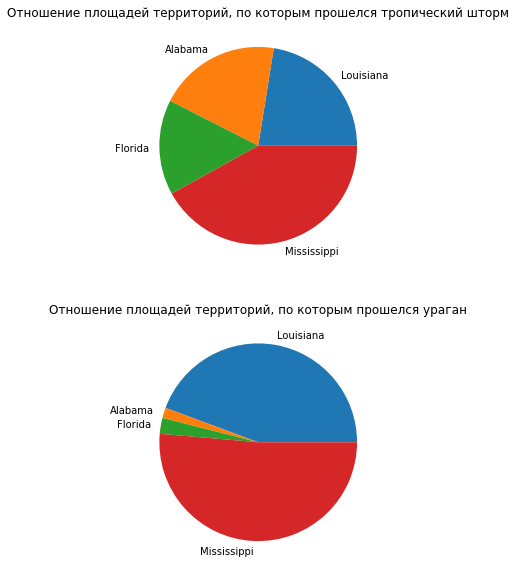

In [113]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pie([damaged_area[key]['storm'] for key in ['Louisiana', 'Alabama', 'Florida', 'Mississippi']],
       labels=['Louisiana', 'Alabama', 'Florida', 'Mississippi'])
plt.title('Отношение площадей территорий, по которым прошелся тропический шторм')
plt.subplot(2, 1, 2)
plt.pie([damaged_area[key]['hurricane'] for key in ['Louisiana', 'Alabama', 'Florida', 'Mississippi']],
       labels=['Louisiana', 'Alabama', 'Florida', 'Mississippi'])
plt.title('Отношение площадей территорий, по которым прошелся ураган')
plt.show()

> Теперь для каждого из приведенных здесь штатов проведу анализ последствий урагана

In [114]:
def GetAmountAndAreaOfCoveredBuildings(hurricane_weak, hurricane_strong, buildings):
    kol_weak = 0
    total_area_weak = 0
    kol_strong = 0
    total_area_strong = 0
    for i in range(len(buildings)):
        building = Polygon(buildings[i]['geometry']['coordinates'][0])
        if hurricane_strong.intersects(building):
            kol_strong += 1
            total_area_strong += building.area
        elif hurricane_weak.intersects(building):
            kol_weak += 1
            total_area_weak += building.area
    return ((kol_weak, total_area_weak), (kol_strong, total_area_strong))

In [115]:
def GetBigBuildings(hurricane_strong, buildings, boundary):
    big_buildings = []
    for i in range(len(buildings)):
        building = Polygon(buildings[i]['geometry']['coordinates'][0])
        if hurricane_strong.intersects(building) and building.area >= boundary:
            big_buildings.append(buildings[i])
    return big_buildings

In [116]:
def PrintInfo(state_name, value, total_amount):
    print('Информация по штату: ' + state_name)
    print('Число зданий, попавших в зону тропического шторма: ' + str(value[0][0]))
    print('Суммарная площадь зданий, попавших в зону тропического шторма: ' + str(value[0][1]))
    print('Число зданий, попавших в зону урагана: ' + str(value[1][0]))
    print('Суммарная площадь зданий, попавших в зону урагана: ' + str(value[1][1]))
    print('Доля зданий (от количества всех зданий в штате), которые были затронуты ураганом или тропическим штормом: ' + 
          str((value[0][0] + value[0][1] + value[1][0] + value[1][1]) / total_amount * 100) + '%')

In [117]:
def SaveData(file_name, data):
    with open(file_name, 'w') as f:
        f.write(str(data[0][0]) + ' ')
        f.write(str(data[0][1]) + ' ')
        f.write(str(data[1][0]) + ' ')
        f.write(str(data[1][1]) + ' ')
        f.close()

In [118]:
def LoadData(file_name):
    with open(file_name) as f:
        data_durty = f.readline().split(' ')
        return ((int(data_durty[0]), float(data_durty[1])), (int(data_durty[2]), float(data_durty[3])))

> Штат Алабама

In [30]:
with open('Alabama.geojson') as f:
    AlabamaBuildings = geojson.load(f)

In [47]:
AlabamaBigBuildings = GetBigBuildings(Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0]), 
                AlabamaBuildings['features'], 1.0e-07)

In [54]:
with open('AlabamaBigBuildings.geojson', 'w') as fp:
    geojson.dump({"type": "FeatureCollection", "features" : AlabamaBigBuildings}, fp)

In [55]:
AlabamaData = GetAmountAndAreaOfCoveredBuildings(Polygon(KatrinaArea['features'][0]['geometry']['coordinates'][0][0]), 
                                         Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0]),
                                         AlabamaBuildings['features'])

In [56]:
SaveData('AlabamaData.txt', AlabamaData)

In [57]:
PrintInfo('Алабама', AlabamaData, len(AlabamaBuildings['features']))

Информация по штату: Алабама
Число зданий, попавших в зону тропического шторма: 429412
Суммарная площадь зданий, попавших в зону тропического шторма: 0.010523017541000407
Число зданий, попавших в зону урагана: 11125
Суммарная площадь зданий, попавших в зону урагана: 0.0002223263115000468
Доля зданий (от количества всех зданий в штате), которые были затронуты ураганом или тропическим штормом: 17.9432532008133%


In [58]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


> Строчку с reset выполнять жизненно необходимо, так как иначе закончится ОЗУ :(

> Теперь нужно запустить все блоки до Алабамы, пропустить Алабаму и выполнить блок для того штата, для которого это нужно. После выполнения операций для обработки какого-то шатата нужно запустить %reset и при необходимости приступить к следующему штату

> Штат Луизиана

In [73]:
with open('Louisiana.geojson') as f:
    LouisianaBuildings = geojson.load(f)

In [78]:
LouisianaBigBuildings = GetBigBuildings(Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0]), 
                LouisianaBuildings['features'], 8.0e-07)

In [80]:
with open('LouisianaBigBuildings.geojson', 'w') as fp:
    geojson.dump({"type": "FeatureCollection", "features" : LouisianaBigBuildings}, fp)

In [81]:
LouisianaData = GetAmountAndAreaOfCoveredBuildings(Polygon(KatrinaArea['features'][0]['geometry']['coordinates'][0][0]), 
                                         Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0]),
                                         LouisianaBuildings['features'])

In [82]:
SaveData('LouisianaData.txt', LouisianaData)

In [83]:
PrintInfo('Луизиана', LouisianaData, len(LouisianaBuildings['features']))

Информация по штату: Луизиана
Число зданий, попавших в зону тропического шторма: 602737
Суммарная площадь зданий, попавших в зону тропического шторма: 0.015527869970501457
Число зданий, попавших в зону урагана: 465358
Суммарная площадь зданий, попавших в зону урагана: 0.0112914010595001
Доля зданий (от количества всех зданий в штате), которые были затронуты ураганом или тропическим штормом: 49.14019336966705%


In [84]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


> Штат Миссисиппи

In [98]:
with open('Mississippi.geojson') as f:
    MississippiBuildings = geojson.load(f)

In [99]:
MississippiBigBuildings = GetBigBuildings(Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0]), 
                MississippiBuildings['features'], 8.0e-07)

In [101]:
with open('MississippiBigBuildings.geojson', 'w') as fp:
    geojson.dump({"type": "FeatureCollection", "features" : MississippiBigBuildings}, fp)

In [102]:
MississippiData = GetAmountAndAreaOfCoveredBuildings(Polygon(KatrinaArea['features'][0]['geometry']['coordinates'][0][0]), 
                                         Polygon(KatrinaArea['features'][1]['geometry']['coordinates'][0][0]),
                                         MississippiBuildings['features'])

In [103]:
SaveData('MississippiData.txt', MississippiData)

In [104]:
PrintInfo('Миссисиппи', MississippiData, len(MississippiBuildings['features']))

Информация по штату: Миссисиппи
Число зданий, попавших в зону тропического шторма: 696779
Суммарная площадь зданий, попавших в зону тропического шторма: 0.018779562489499746
Число зданий, попавших в зону урагана: 408099
Суммарная площадь зданий, попавших в зону урагана: 0.010181960693999327
Доля зданий (от количества всех зданий в штате), которые были затронуты ураганом или тропическим штормом: 73.29226936333649%


In [105]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


> На обработку штата Флорида у меня не хватает ОЗУ :(

> Теперь немного визуализации

In [119]:
AlabamaData = LoadData('AlabamaData.txt')
LouisianaData = LoadData('LouisianaData.txt')
MississippiData = LoadData('MississippiData.txt')

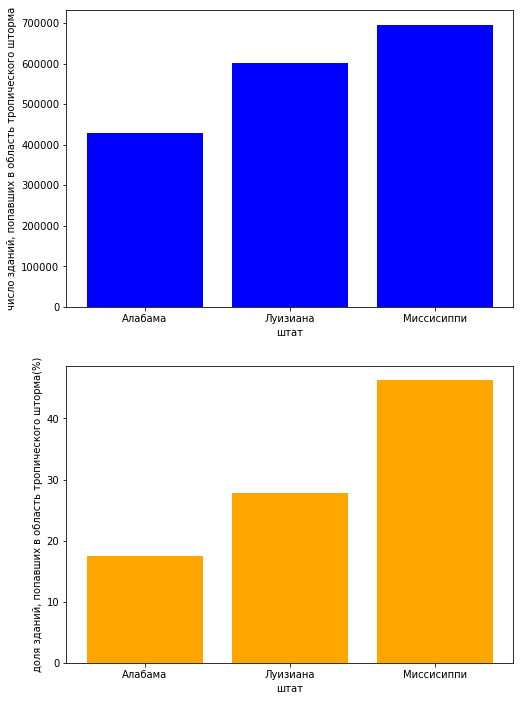

In [120]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.bar(['Алабама', 'Луизиана', 'Миссисиппи'], [i[0][0] for i in [AlabamaData, LouisianaData, MississippiData]],
        color=['blue' for i in range(3)])
plt.ylabel('число зданий, попавших в область тропического шторма')
plt.xlabel('штат')
plt.subplot(2, 1, 2)
plt.bar(['Алабама', 'Луизиана', 'Миссисиппи'], [AlabamaData[0][0] / 2455168 * 100, LouisianaData[0][0] / 2173567 * 100, 
                                               MississippiData[0][0] / 1507496 * 100], color=['orange' for i in range(3)])
plt.ylabel('доля зданий, попавших в область тропического шторма(%)')
plt.xlabel('штат')
plt.show()

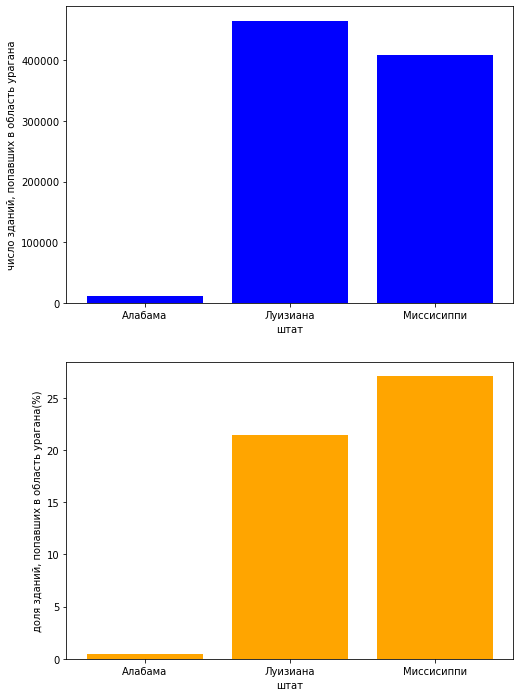

In [121]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.bar(['Алабама', 'Луизиана', 'Миссисиппи'], [i[1][0] for i in [AlabamaData, LouisianaData, MississippiData]],
        color=['blue' for i in range(3)])
plt.ylabel('число зданий, попавших в область урагана')
plt.xlabel('штат')
plt.subplot(2, 1, 2)
plt.bar(['Алабама', 'Луизиана', 'Миссисиппи'], [AlabamaData[1][0] / 2455168 * 100, LouisianaData[1][0] / 2173567 * 100, 
                                               MississippiData[1][0] / 1507496 * 100], color=['orange' for i in range(3)])
plt.ylabel('доля зданий, попавших в область урагана(%)')
plt.xlabel('штат')
plt.show()

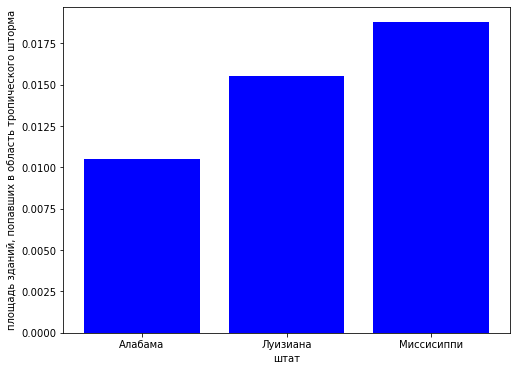

In [122]:
plt.figure(figsize=(8, 6))
plt.bar(['Алабама', 'Луизиана', 'Миссисиппи'], [i[0][1] for i in [AlabamaData, LouisianaData, MississippiData]],
        color=['blue' for i in range(3)])
plt.ylabel('площадь зданий, попавших в область тропического шторма')
plt.xlabel('штат')
plt.show()

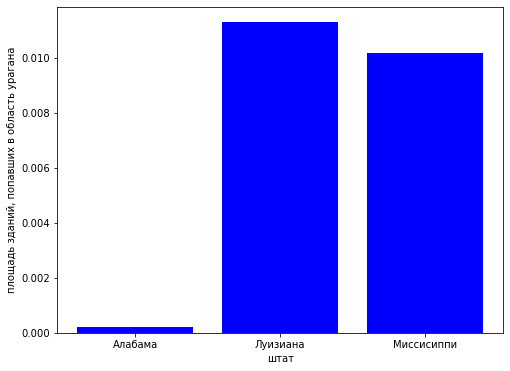

In [123]:
plt.figure(figsize=(8, 6))
plt.bar(['Алабама', 'Луизиана', 'Миссисиппи'], [i[1][1] for i in [AlabamaData, LouisianaData, MississippiData]],
        color=['blue' for i in range(3)])
plt.ylabel('площадь зданий, попавших в область урагана')
plt.xlabel('штат')
plt.show()